In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from help_functions.evaluate_energymodels import evaluate_different_energymodels, evaluate_energymodel
from energy_consumption.feature_selection.extract.extract_energy_data import get_data
from energy_consumption.feature_selection.clean.impute_outliers import impute_outliers

from energy_consumption.models.lasso.lasso import get_Lasso_forecasts
from energy_consumption.models.quantreg.quantreg import get_QuantReg_forecasts
from energy_consumption.models.baseline import get_baseline_forecasts
from energy_consumption.models.knn.knn import get_KNNRegression_forecasts
from energy_consumption.models.XGBoost.XGBoost import get_XGBoost_forecasts

In [5]:
energydata = pd.read_csv(
        'c:\\Users\\Maria\\Documents\\Studium\\Pyhton Projekte\\PTSFC\\energy_consumption\\feature_selection\\data\\historical_data.csv')
energydata['date_time'] = pd.to_datetime(
energydata['date_time'], format='%Y-%m-%d %H:%M:%S')
energydata = energydata.set_index("date_time")
energydata = impute_outliers(energydata)

In [ ]:
lasso = {
    'name': 'lasso regression',
    'function': get_Lasso_forecasts
}
evaluate_energymodel(
    lasso, energydata, last_x=50, weeks = True)

In [6]:
# Functions work
lasso = {
    'name': 'lasso regression',
    'function': get_Lasso_forecasts
}
quantreg = {
    'name': 'quantile regression',
    'function': get_QuantReg_forecasts
}
baseline = { 
    'name': 'baseline', 
    'function': get_baseline_forecasts
}
knn = {
    'name': 'knn',
    'function': get_KNNRegression_forecasts
}
xgboost = {
    'name': 'xgboost', 
    'function': get_XGBoost_forecasts
}
models = [xgboost, lasso, quantreg, baseline, knn]
evaluation = evaluate_different_energymodels(
    models, energydata, last_x=3, years=False, months=False, weeks=True)

*********** Start the evaluation of model xgboost***********
2016-12-26 00:00:00
2023-11-16 12:00:00
2023-11-15 13:00:00
2023-11-20 16:00:00


KeyboardInterrupt: 

### Visualize Comparison 

1. Create a table that only contains the different scores of the different models

In [7]:
models[0]['evaluation']

,forecast_date,target,horizon,q0.025,q0.25,q0.5,q0.75,q0.975,energy_consumption,score
date_time,,,,,,,,,,
2023-11-17 12:00:00,2024-01-15,energy,36 hour,45.645198,55.360812,62.338699,67.769609,72.258956,66.74250,11.938887
2023-11-17 16:00:00,2024-01-15,energy,40 hour,45.645198,55.360812,61.653518,65.065661,71.015216,62.46675,6.934158
2023-11-17 20:00:00,2024-01-15,energy,44 hour,45.645198,55.360812,61.653518,65.065661,71.015216,58.89500,8.879443
2023-11-18 12:00:00,2024-01-15,energy,60 hour,45.810177,53.317998,58.063171,60.777884,69.284122,56.03125,6.935561
2023-11-18 16:00:00,2024-01-15,energy,64 hour,45.810177,53.317998,57.776590,58.871572,68.812263,55.77425,5.929231
2023-11-18 20:00:00,2024-01-15,energy,68 hour,45.810177,53.317998,57.776590,58.871572,68.812263,54.40575,7.297731
2023-11-10 12:00:00,2024-01-15,energy,36 hour,44.391351,53.580387,61.938466,65.724028,68.421344,66.62375,13.758049
2023-11-10 16:00:00,2024-01-15,energy,40 hour,44.391351,53.580387,60.150055,62.362522,66.936994,62.83525,9.149001
2023-11-10 20:00:00,2024-01-15,energy,44 hour,44.391351,53.580387,60.150055,62.362522,66.936994,57.86075,7.807654


In [8]:
horizons = ['36 hour', '40 hour', '44 hour', '60 hour', '64 hour', '68 hour']
scores = []
names = []
for h in horizons:
    for m in models:
        col_name = f'{m["name"]}: {h}'
        scores.append(m['evaluation']['score']
                      [m['evaluation']['horizon'] == h])
        names.append(col_name)

score_df = pd.concat(scores, axis=1, keys=names)

2.  Plot the densities of the obtained scores

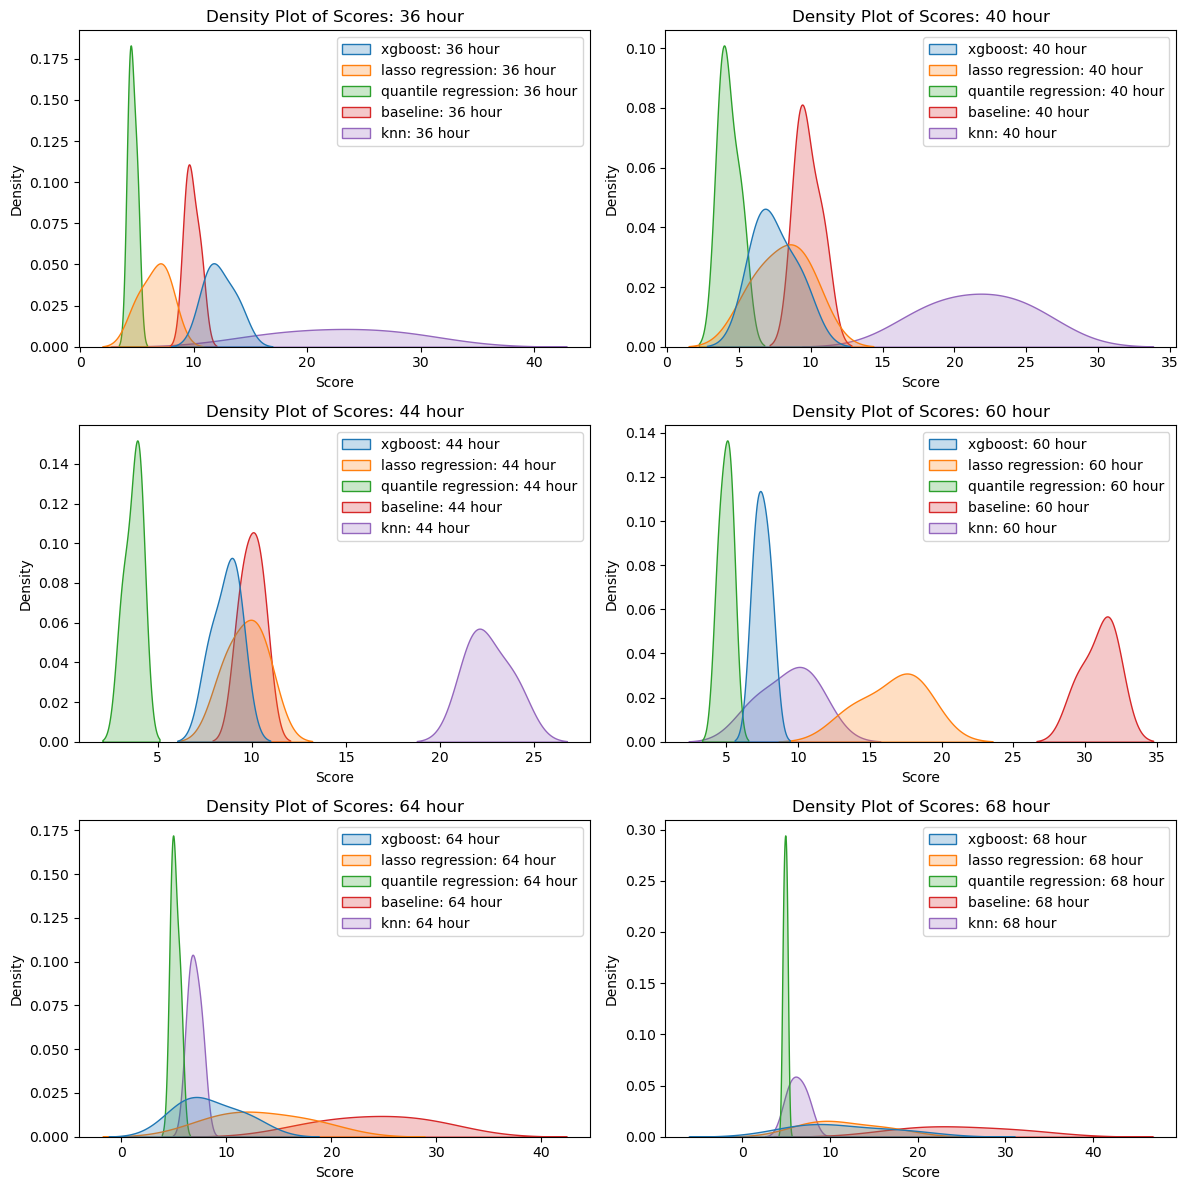

In [9]:
# Create subplots
fig, axes = plt.subplots(3,2, figsize=(12,12))

# Flatten the 2D array of subplots to simplify indexing
axes = axes.flatten()

# Loop through each horizon
for i, h in enumerate(horizons):
    # Select columns related to the current horizon
    relevant_cols = [f'{m["name"]}: {h}' for m in models]

    # Filter the relevant data for the current horizon
    data_subset = score_df.loc[:, relevant_cols]

    # Create a KDE plot for the current horizon
    sns.kdeplot(data=data_subset, fill=True, ax=axes[i])

    # Set labels and title for each subplot
    axes[i].set_xlabel('Score')
    axes[i].set_ylabel('Density')
    axes[i].set_title(f'Density Plot of Scores: {h}')

# Adjust layout to prevent overlap of subplots
plt.tight_layout()

# Display the plots
plt.show()

Interpretation: Für Freitag ist timely besser, für Samstag nicht

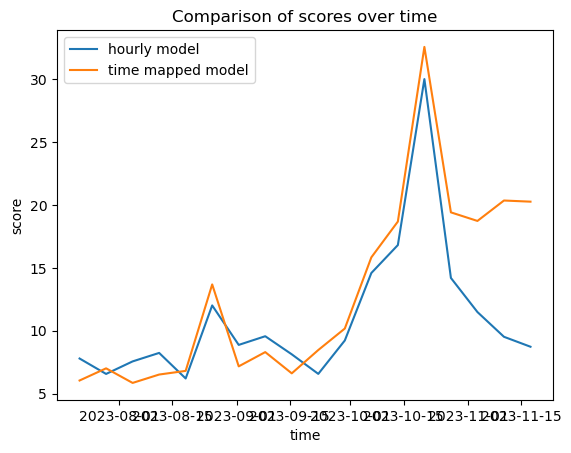

In [14]:
# Plot values from two columns over time
score_df_36_no_na = score_df[score_df['seasonal model hourly: 36 hour'].notna(
)]
# plt.plot(score_df_36_no_na.index, score_df_36_no_na['baseline: 36 hour'], label='baseline')
plt.plot(score_df_36_no_na.index,
         score_df_36_no_na['seasonal model hourly: 36 hour'], label='hourly model')

plt.plot(score_df_36_no_na.index,
         score_df_36_no_na['seasonal model with time mapping: 36 hour'], label='time mapped model')

# Adding labels and title
plt.xlabel('time')
plt.ylabel('score')
plt.title('Comparison of scores over time')

# Display legend
plt.legend()

# Show the plot
plt.show()